<a href="https://colab.research.google.com/github/xinlei55555/PharmaHacks2023/blob/main/stem_cell_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
train_df = pd.read_csv("/content/drive/MyDrive/Hackathon Squad/PharmaHacks/stem_cells/train_data.csv")
test_df = pd.read_csv("/content/drive/MyDrive/Hackathon Squad/PharmaHacks/stem_cells/test_data_corrected.csv")
train_df

,dd0 Cell Density,dd0-dd1 Cell Density Gradient,dd1 Cell Density,dd1-dd2 Cell Density Gradient,dd2 Cell Density,dd2-dd3 Cell Density Gradient,dd3 Cell Density,dd3-dd5 Cell Density Gradient,dd5 Cell Density,dd5-dd7 Cell Density Gradient,...,dd1 Lactate Concentration,dd3 Lactate Concentration,dd5 Lactate Concentration,dd7 Lactate Concentration,dd0 Glucose Concentration,dd1 Glucose Concentration,dd3 Glucose Concentration,dd5 Glucose Concentration,dd7 Glucose Concentration,dd10 CM Content
0,0.725,0.213793,0.8800,0.190070,1.047261,-0.040354,1.0050,0.810945,1.8200,-0.144394,...,14.025000,2.090000,17.780000,5.935000,9.180000,3.895000,9.875000,0.635000,7.555000,75.70
1,0.650,0.384615,0.9000,0.190070,1.071063,0.246426,1.3350,0.749064,2.3350,-0.144394,...,13.350000,2.165000,17.105000,12.510000,9.520000,4.470000,10.145000,1.010000,2.910000,75.00
2,0.880,0.022727,0.9000,0.190070,1.071063,-0.038338,1.0300,0.611650,1.6600,-0.144394,...,13.670000,1.775000,19.050000,7.210000,9.027500,4.415000,10.270000,0.000000,6.745000,55.60
3,0.785,0.363057,1.0700,0.190070,1.273374,-0.462059,0.6850,0.510949,1.0350,-0.144394,...,11.955000,0.995000,16.430000,14.295000,8.995000,5.155000,10.255000,2.270000,2.135000,57.70
4,0.410,0.975610,0.8100,0.190070,0.963956,1.778134,2.6780,-0.002987,2.6700,-0.376404,...,11.300000,15.100000,16.425000,14.455000,9.547500,1.700000,0.017500,1.610000,1.065000,63.00
5,0.295,0.084746,0.3200,0.190070,0.380822,1.384314,0.9080,-0.251101,0.6800,0.014706,...,10.100000,12.100000,12.130000,12.835000,10.795000,0.600000,3.605000,3.765000,3.095000,19.20
6,1.185,-0.392405,0.7200,0.190070,0.856850,1.873898,2.4625,-0.145178,2.1050,-0.420428,...,11.300000,14.700000,15.776212,16.575000,8.715000,1.800000,1.212500,2.125769,0.960000,63.80
7,1.185,-0.755274,0.2900,0.190070,0.345120,4.128648,1.7700,-0.401130,1.0600,-0.023585,...,11.500000,13.375000,18.930000,14.225000,7.135000,0.700000,0.487500,0.000000,1.765000,29.80
8,0.660,-0.037879,0.6350,0.763780,1.120000,1.026786,2.2700,-0.176211,1.8700,-0.144394,...,13.818782,14.366667,16.175000,13.370256,9.220000,3.647831,1.910347,2.130000,2.671346,60.40
9,1.210,-0.305785,0.8400,0.500000,1.260000,1.198413,2.7700,-0.393502,1.6800,-0.144394,...,13.818782,14.366667,17.275000,13.370256,9.422500,3.647831,1.910347,0.560000,2.671346,11.70


In [5]:
test_df

,dd0 Cell Density,dd0-dd1 Cell Density Gradient,dd1 Cell Density,dd1-dd2 Cell Density Gradient,dd2 Cell Density,dd2-dd3 Cell Density Gradient,dd3 Cell Density,dd3-dd5 Cell Density Gradient,dd5 Cell Density,dd5-dd7 Cell Density Gradient,...,dd1 Lactate Concentration,dd3 Lactate Concentration,dd5 Lactate Concentration,dd7 Lactate Concentration,dd0 Glucose Concentration,dd1 Glucose Concentration,dd3 Glucose Concentration,dd5 Glucose Concentration,dd7 Glucose Concentration,dd10 CM Content
0,0.650,0.376923,0.8950,0.184358,1.0600,1.301887,2.440,-0.131148,2.12,0.316038,...,13.2,16.1,10.0,11.6,11.3,5.7,0.3,4.7,2.3,88
1,0.430,0.651163,0.7100,0.887324,1.3400,1.074627,2.780,-0.532374,1.30,0.400000,...,13.4,16.5,12.6,14.6,11.5,6.2,0.6,2.7,0.7,80
2,0.680,0.470588,1.0000,0.790000,1.7900,0.446927,2.590,-0.254826,1.93,0.000000,...,12.2,16.0,11.7,10.4,12.4,5.9,1.0,3.8,3.4,92
3,0.780,0.166667,0.9100,0.439560,1.3100,0.538168,2.015,-0.136476,1.74,0.172414,...,12.1,16.5,10.1,8.9,11.6,4.8,0.3,4.7,4.1,76
4,0.575,0.295652,0.7450,1.456376,1.8300,0.256831,2.300,-0.639130,0.83,0.445783,...,12.3,17.1,11.6,11.8,10.6,5.7,1.3,4.9,5.3,21
5,0.710,-0.021127,0.6950,1.413669,1.6775,0.335320,2.240,-0.781250,0.49,0.744898,...,11.1,16.2,5.9,5.9,10.2,6.2,1.9,8.1,8.7,24
6,0.535,0.303738,0.6975,1.709677,1.8900,0.179894,2.230,-0.591928,0.91,0.769231,...,11.6,17.0,13.3,11.7,11.1,5.3,0.8,4.2,4.9,42
7,0.560,0.625000,0.9100,1.184066,1.9875,0.122013,2.230,-0.282511,1.60,0.793750,...,13.2,17.6,12.1,14.9,11.0,4.7,0.6,4.7,2.2,80
8,0.730,0.684932,1.2300,0.430894,1.7600,0.153409,2.030,0.256158,2.55,-0.164706,...,14.2,16.4,15.3,16.7,9.0,3.9,0.0,2.3,0.0,92
9,0.630,-0.206349,0.5000,0.020000,0.5100,0.882353,0.960,-0.187500,0.78,0.115385,...,11.9,16.2,12.2,13.4,9.5,5.3,2.3,4.8,3.1,74


In [7]:
y_train = train_df["dd10 CM Content"]
x_train = train_df.drop(columns=["dd10 CM Content"])
y_test = test_df["dd10 CM Content"]
x_test = test_df.drop(columns=["dd10 CM Content"])

##labeling the data

In [8]:
sufficient_treshhold = 90
label_train = (y_train > sufficient_treshhold)*1
train_df["label"] = label_train
label_test = (y_test > sufficient_treshhold)*1
test_df["label"] = label_test
label_train.value_counts(), label_test.value_counts()

(0    29
 1    13
 Name: dd10 CM Content, dtype: int64, 0    13
 1     5
 Name: dd10 CM Content, dtype: int64)

In [ ]:
train_suff = train_df[train_df["label"]==1]
train_suff

,dd0 Cell Density,dd0-dd1 Cell Density Gradient,dd1 Cell Density,dd1-dd2 Cell Density Gradient,dd2 Cell Density,dd2-dd3 Cell Density Gradient,dd3 Cell Density,dd3-dd5 Cell Density Gradient,dd5 Cell Density,dd5-dd7 Cell Density Gradient,...,dd3 Lactate Concentration,dd5 Lactate Concentration,dd7 Lactate Concentration,dd0 Glucose Concentration,dd1 Glucose Concentration,dd3 Glucose Concentration,dd5 Glucose Concentration,dd7 Glucose Concentration,dd10 CM Content,label
15,0.85,0.411765,1.200,0.379167,1.655,0.244713,2.060,-0.235437,1.575,0.117460,...,15.830000,15.776212,12.880,9.110000,3.647831,0.000000,2.125769,1.360,97.4,1
21,0.58,0.724138,1.000,0.150000,1.150,0.200000,1.380,0.304348,1.800,-0.355556,...,18.120000,18.605000,18.985,9.255000,2.725000,0.000000,2.560000,0.625,90.1,1
22,0.70,0.585714,1.110,0.423423,1.580,0.297468,2.050,0.492683,3.060,-0.346405,...,16.205000,18.050000,17.225,9.190000,3.705000,0.000000,0.940000,0.565,96.1,1
23,0.80,0.412500,1.130,0.831858,2.070,-0.403382,1.235,-0.370040,0.778,-0.794344,...,16.150000,10.460000,15.370,8.277500,2.735000,0.000000,5.035000,0.525,93.0,1
24,0.75,0.293333,0.970,0.804124,1.750,-0.294286,1.235,0.206478,1.490,0.255034,...,14.970000,14.500000,7.920,8.507500,2.350000,0.000000,2.005000,6.075,94.9,1
25,1.00,0.340000,1.340,0.203731,1.613,0.078735,1.740,-0.068966,1.620,0.401235,...,14.366667,19.700000,18.395,9.495085,2.560000,1.910347,0.820000,0.000,95.8,1
27,1.28,-0.175781,1.055,0.706161,1.800,0.238889,2.230,-0.071749,2.070,-0.265700,...,14.366667,19.370000,6.915,9.495085,4.470000,1.910347,1.060000,0.325,94.7,1
36,0.52,0.923077,1.000,0.030000,1.030,0.572816,1.620,-0.037037,1.560,0.000000,...,13.545000,10.610000,7.235,10.165000,4.715000,2.780000,4.650000,5.820,94.0,1
37,0.63,0.079365,0.680,0.911765,1.300,-0.030769,1.260,0.000000,1.260,0.134921,...,16.405000,15.085000,13.175,10.257500,5.200000,1.165000,2.430000,2.085,92.0,1
38,0.62,0.596774,0.990,1.237374,2.215,0.214447,2.690,0.018587,2.740,-0.228102,...,16.805000,15.495000,15.455,9.685000,4.010000,0.560000,1.855000,0.595,95.0,1


##Data generation with Variational Autoencoder (VAE)

In [ ]:
from keras import backend as K

latent_dim = 20
sample_dim = x_train.shape[1]

class Sampling(tf.keras.layers.Layer):
 def call(self, inputs):
  mean, log_var = inputs
  return K.random_normal(tf.shape(log_var)) * K.exp(log_var / 2)+mean

  # std_norm = K.random_normal(shape=(K.shape(mean)[0], latent_dim), mean=0, stddev=1)
  # return mean + K.exp(log_var) * std_norm

In [ ]:
def sampler(inputs):
    # std_norm = K.random_normal(shape=(K.shape(mean)[0], latent_dim), mean=0, stddev=1)
    # return mean + K.exp(var) * std_norm
    mean, log_var = inputs
    return K.random_normal(tf.shape(log_var)) * K.exp(log_var / 2)+mean
    

In [ ]:
sample = Lambda(sampler)([0.3, 0.4])
type(sample.value)

AttributeError: ignored

In [ ]:
from tensorflow.keras.layers import *
K.clear_session()


inputs = Input(shape=(sample_dim,))
x = Dense(128, activation="relu")(inputs)
# x = Dropout(0.2)(x)
x = Dense(64, activation="relu")(x)
x = Dense(32, activation="relu")(x)

latent_mean = Dense(latent_dim)(x)
latent_log_var = Dense(latent_dim)(x)

sample = Lambda(sampler)([latent_mean, latent_log_var])

encoder = tf.keras.models.Model(inputs=inputs, outputs=[latent_mean])

sample = encoder(inputs)
# decoder_inputs = Input(shape=(latent_dim,))
x = Dense(32, activation="relu")(sample)
x = Dense(64, activation="relu")(x)
x = Dense(128, activation="relu")(x)
outputs = Dense(sample_dim, activation="tanh")(x)

decoder = tf.keras.models.Model(inputs=[sample], outputs=[outputs])

# _, _, sample = encoder(inputs)
# reconstructions = decoder(sample)
vae = tf.keras.models.Model(inputs=[inputs], outputs=[outputs])

In [ ]:
encoder.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 102)]        0           []                               
                                                                                                  
 dense (Dense)                  (None, 128)          13184       ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 64)           8256        ['dense[0][0]']                  
                                                                                                  
 dense_2 (Dense)                (None, 32)           2080        ['dense_1[0][0]']                
                                                                                              

In [ ]:
decoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 20)]              0         
                                                                 
 dense_5 (Dense)             (None, 32)                672       
                                                                 
 dense_6 (Dense)             (None, 64)                2112      
                                                                 
 dense_7 (Dense)             (None, 128)               8320      
                                                                 
 dense_8 (Dense)             (None, 102)               13158     
                                                                 
Total params: 24,262
Trainable params: 24,262
Non-trainable params: 0
_________________________________________________________________


In [ ]:
vae.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 102)]             0         
                                                                 
 model (Functional)          (None, 20)                24840     
                                                                 
 dense_5 (Dense)             (None, 32)                672       
                                                                 
 dense_6 (Dense)             (None, 64)                2112      
                                                                 
 dense_7 (Dense)             (None, 128)               8320      
                                                                 
 dense_8 (Dense)             (None, 102)               13158     
                                                                 
Total params: 49,102
Trainable params: 49,102
Non-trainable

In [ ]:
# latent_loss = -0.5 * K.sum(1 + latent_log_var - K.exp(latent_log_var) - K.square(latent_mean), axis=-1)
# vae.add_loss(K.mean(latent_loss)/(sample_dim*1.))
vae.compile(loss="mse", optimizer="adam", metrics=["mse"])

vae.fit(x_train, x_train, epochs=10)

Epoch 1/10
2/2 [==============================] - 2s 13ms/step - loss: 16653.4180 - mse: 16653.4180
Epoch 2/10
2/2 [==============================] - 0s 9ms/step - loss: 16634.3418 - mse: 16634.3418
Epoch 3/10
2/2 [==============================] - 0s 9ms/step - loss: 16622.9160 - mse: 16622.9160
Epoch 4/10
2/2 [==============================] - 0s 7ms/step - loss: 16610.5215 - mse: 16610.5215
Epoch 5/10
2/2 [==============================] - 0s 8ms/step - loss: 16605.7539 - mse: 16605.7539
Epoch 6/10
2/2 [==============================] - 0s 8ms/step - loss: 16600.6602 - mse: 16600.6602
Epoch 7/10
2/2 [==============================] - 0s 8ms/step - loss: 16597.8008 - mse: 16597.8008
Epoch 8/10
2/2 [==============================] - 0s 12ms/step - loss: 16595.4160 - mse: 16595.4160
Epoch 9/10
2/2 [==============================] - 0s 8ms/step - loss: 16593.1172 - mse: 16593.1172
Epoch 10/10
2/2 [==============================] - 0s 9ms/step - loss: 16592.1523 - mse: 16592.1523


In [ ]:
pred = vae.predict(x_train)
pred

2/2 [==============================] - 0s 6ms/step


array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

In [ ]:
#second method

class VAE(Model):
  def __init__(self, x):
    super(detector, self).__init__()
    # self.encoder = tf.keras.Sequential([
    #                                     layers.Dense(10, activation="relu"),
    #                                     layers.Dense(10, activation='relu')
    # ])
    # self.latent_mean = self.encoder.layers[-1]
    # self.latent_mean = self.encoder.layers[-1]
    # self.decoder = tf.keras.Sequential([
    #                                     layers.Dense(10, activation='relu'),
    #                                     layers.Dense(x, activation='sigmoid')
    # ])
    enc_inputs = Inputs(shape=(sample_dim))

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded


##feature selection

###correlation matrix

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

#correlation with cm content
corr_matrix = train_df.drop(columns=["label"]).corr()
corr_matrix

,dd0 Cell Density,dd0-dd1 Cell Density Gradient,dd1 Cell Density,dd1-dd2 Cell Density Gradient,dd2 Cell Density,dd2-dd3 Cell Density Gradient,dd3 Cell Density,dd3-dd5 Cell Density Gradient,dd5 Cell Density,dd5-dd7 Cell Density Gradient,...,dd1 Lactate Concentration,dd3 Lactate Concentration,dd5 Lactate Concentration,dd7 Lactate Concentration,dd0 Glucose Concentration,dd1 Glucose Concentration,dd3 Glucose Concentration,dd5 Glucose Concentration,dd7 Glucose Concentration,dd10 CM Content
dd0 Cell Density,1.000000,-0.748678,-0.045515,-0.126171,-0.095121,0.237245,0.168019,0.030218,0.165385,-0.124950,...,-0.248646,-0.092813,0.485890,0.072280,-0.663340,0.297062,-0.040743,-0.543602,-0.170400,0.051804
dd0-dd1 Cell Density Gradient,-0.748678,1.000000,0.573666,-0.181711,0.196476,-0.340471,-0.143219,-0.042467,-0.117936,0.254655,...,0.567419,0.142378,-0.296900,-0.052858,0.714385,-0.229500,0.039917,0.530832,0.066418,0.133828
dd1 Cell Density,-0.045515,0.573666,1.000000,-0.363004,0.391712,-0.534587,-0.075288,0.155606,0.115323,0.234204,...,0.566178,-0.025166,0.033383,-0.030100,0.208887,0.126361,0.116885,0.226163,-0.024747,0.501967
dd1-dd2 Cell Density Gradient,-0.126171,-0.181711,-0.363004,1.000000,0.681557,-0.202434,0.408881,-0.401337,-0.049467,-0.349123,...,-0.138785,0.358478,-0.238332,0.051140,0.117361,0.122085,-0.352107,0.008213,0.118819,-0.369686
dd2 Cell Density,-0.095121,0.196476,0.391712,0.681557,1.000000,-0.558835,0.418189,-0.296588,0.104257,-0.175528,...,0.236107,0.365829,-0.172147,0.034134,0.182414,0.192192,-0.325353,0.127555,0.077520,0.063460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
dd1 Glucose Concentration,0.297062,-0.229500,0.126361,0.122085,0.192192,-0.351435,0.096651,0.275324,0.301098,-0.202190,...,-0.202893,-0.130987,-0.003319,-0.190023,-0.039518,1.000000,0.186671,-0.138549,-0.055118,0.204414
dd3 Glucose Concentration,-0.040743,0.039917,0.116885,-0.352107,-0.325353,-0.170979,-0.473735,0.497316,-0.158654,0.146914,...,-0.078486,-0.942823,0.048211,-0.450599,0.061412,0.186671,1.000000,-0.031466,0.398632,-0.079973
dd5 Glucose Concentration,-0.543602,0.530832,0.226163,0.008213,0.127555,-0.272926,-0.231778,-0.393901,-0.510532,0.120735,...,0.208976,0.203257,-0.822056,-0.198378,0.495439,-0.138549,-0.031466,1.000000,0.135265,0.028093
dd7 Glucose Concentration,-0.170400,0.066418,-0.024747,0.118819,0.077520,-0.127436,-0.045883,-0.019804,-0.164294,0.280487,...,-0.144233,-0.368948,-0.270103,-0.662869,0.127041,-0.055118,0.398632,0.135265,1.000000,-0.144717


In [10]:
corr_treshhold = 0.2
selected_features = corr_matrix[abs(corr_matrix["dd10 CM Content"])>=corr_treshhold].index
# selected_features = selected_features.remove("dd10 CM Content")
selected_features = list(selected_features)
selected_features.remove("dd10 CM Content")
sum_features = len(selected_features)
x_train_corr = x_train[selected_features]
x_train_corr

,dd1 Cell Density,dd1-dd2 Cell Density Gradient,dd2-dd3 Cell Density Gradient,dd3-dd5 Cell Density Gradient,dd5 Cell Density,dd7 Cell Density,dd0 Aggregate Size,dd0-dd1 Aggregate Size Gradient,dd3-dd5 Aggregate Size Gradient,dd5 Aggregate Size,...,dd2 Average pH Gradient,dd3 Average pH,dd3 Average pH Gradient,dd4 Average pH Gradient,dd6 Average pH,dd7 Average pH,dd7 Average pH Gradient,dd0 Lactate Concentration,dd0 Glucose Concentration,dd1 Glucose Concentration
0,0.8800,0.190070,-0.040354,0.810945,1.8200,1.557203,121.616004,0.111218,-0.056162,115.771157,...,-0.120081,6.923156,-0.020806,-0.005372,6.675912,7.039821,-0.010012,13.675000,9.180000,3.895000
1,0.9000,0.190070,0.246426,0.749064,2.3350,1.997840,114.421927,0.273493,0.390157,159.662464,...,-0.086555,6.843135,-0.030596,0.003752,6.862538,6.948120,0.002797,14.115000,9.520000,4.470000
2,0.9000,0.190070,-0.038338,0.611650,1.6600,1.420306,118.950489,0.570670,0.256804,199.699778,...,-0.118429,6.925697,-0.021462,-0.003551,6.539343,6.976567,-0.013500,14.440000,9.027500,4.415000
3,1.0700,0.190070,-0.462059,0.510949,1.0350,0.885552,125.587593,-0.031354,-0.043808,142.844269,...,-0.114203,6.973194,-0.014916,-0.003063,6.777440,6.800375,0.000917,13.995000,8.995000,5.155000
4,0.8100,0.190070,1.778134,-0.002987,2.6700,1.665000,91.884182,0.603649,0.640537,290.390790,...,-0.009525,6.555047,-0.142153,0.000771,6.759520,6.771208,0.000542,13.057500,9.547500,1.700000
5,0.3200,0.190070,1.384314,-0.251101,0.6800,0.690000,85.009226,0.319822,3.263893,754.749940,...,-0.012204,7.057688,-0.084220,-0.005086,6.805000,6.804625,0.000042,11.585000,10.795000,0.600000
6,0.7200,0.190070,1.873898,-0.145178,2.1050,1.220000,148.907830,0.337195,0.520885,270.133440,...,-0.006664,6.500953,-0.022175,0.001725,6.724308,7.228606,-0.164230,15.045000,8.715000,1.800000
7,0.2900,0.190070,4.128648,-0.401130,1.0600,1.035000,138.172230,0.291568,0.736758,380.560120,...,-0.013687,7.363973,-0.172201,-0.005074,6.790000,6.893677,-0.113081,12.377500,7.135000,0.700000
8,0.6350,0.763780,1.026786,-0.176211,1.8700,1.599983,112.987955,0.281741,0.051994,204.397478,...,-0.136431,7.156556,-0.008262,-0.182321,7.027037,6.968680,-0.000175,12.755000,9.220000,3.647831
9,0.8400,0.500000,1.198413,-0.393502,1.6800,1.437418,122.439462,0.250084,0.157845,184.276443,...,-0.176470,6.944548,-0.017291,-0.090531,7.026630,7.186800,-0.105358,15.830000,9.422500,3.647831


In [11]:
#correlation with label

corr_label = train_df.corr()
corr_label["label"] = abs(corr_label["label"])
corr_label = corr_label.sort_values(by=["label"], ascending=False)
corr_label

,dd0 Cell Density,dd0-dd1 Cell Density Gradient,dd1 Cell Density,dd1-dd2 Cell Density Gradient,dd2 Cell Density,dd2-dd3 Cell Density Gradient,dd3 Cell Density,dd3-dd5 Cell Density Gradient,dd5 Cell Density,dd5-dd7 Cell Density Gradient,...,dd3 Lactate Concentration,dd5 Lactate Concentration,dd7 Lactate Concentration,dd0 Glucose Concentration,dd1 Glucose Concentration,dd3 Glucose Concentration,dd5 Glucose Concentration,dd7 Glucose Concentration,dd10 CM Content,label
label,-0.117211,0.216289,0.478962,-0.113725,0.304576,-0.228639,0.007071,-0.020859,0.086341,0.286047,...,0.236770,-0.164220,-0.115391,-0.071001,0.037699,-0.254564,0.219057,-0.166407,0.630315,1.000000
dd10 CM Content,0.051804,0.133828,0.501967,-0.369686,0.063460,-0.301460,-0.177667,0.376424,0.309899,0.170315,...,0.072379,0.098049,-0.023592,-0.238076,0.204414,-0.079973,0.028093,-0.144717,1.000000,0.630315
dd1 Cell Density,-0.045515,0.573666,1.000000,-0.363004,0.391712,-0.534587,-0.075288,0.155606,0.115323,0.234204,...,-0.025166,0.033383,-0.030100,0.208887,0.126361,0.116885,0.226163,-0.024747,0.501967,0.478962
Start Preculture Perfusion [h after inoc] d1-d2,0.101357,-0.286560,-0.460867,-0.232293,-0.576624,0.687861,0.070622,-0.020628,-0.024281,-0.058413,...,-0.424331,0.109401,-0.044046,-0.209767,-0.382672,0.321781,-0.249585,0.035739,-0.507838,0.402405
dd5-dd7 Aggregate Size Gradient,-0.290603,0.387221,0.301669,0.005062,0.251639,-0.168791,-0.043371,-0.049893,-0.097971,-0.014976,...,0.059673,-0.286827,-0.126952,-0.036238,0.145818,0.007580,0.373235,0.061092,0.348427,0.392906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
dd7 Aggregate Size,0.052869,-0.102596,-0.282846,-0.387720,-0.548762,0.645526,-0.193860,-0.114732,-0.186674,0.215108,...,0.092949,0.119570,0.260754,-0.248433,-0.413769,-0.154355,-0.016742,-0.258009,0.026228,0.007252
dd3 Cell Density,0.168019,-0.143219,-0.075288,0.408881,0.418189,0.344702,1.000000,-0.468588,0.554562,-0.265703,...,0.437284,0.009235,0.072192,-0.038231,0.096651,-0.473735,-0.231778,-0.045883,-0.177667,0.007071
dd1 Average pH Gradient,0.124771,-0.128731,-0.130342,0.006830,-0.120236,0.083579,-0.053300,0.075855,0.111680,-0.128574,...,0.094024,-0.039691,0.062656,-0.081451,-0.043543,-0.100975,0.036257,-0.076502,0.195225,0.002843
dd6 Average pH,-0.162222,0.089100,-0.074542,0.377050,0.235221,-0.100545,0.152732,-0.493741,-0.314028,-0.113825,...,0.281032,-0.456968,-0.122397,0.339670,0.043483,-0.233622,0.415867,0.106573,-0.234377,0.001870


In [12]:
num_lbl_features = 60
selected_features_lbl = list(corr_label.index)
# print(selected_features_lbl)
selected_features_lbl.remove("dd10 CM Content")
selected_features_lbl.remove("label")
selected_features_lbl = selected_features_lbl[:num_lbl_features]

final_features = []

for f in selected_features_lbl:
  if f in selected_features:
    final_features.append(f)

final_features, len(final_features)

(['dd1 Cell Density',
  'Start Preculture Perfusion [h after inoc] d1-d2',
  'dd5-dd7 Aggregate Size Gradient',
  'Average DO concentration gradient dd4',
  'dd7 Cell Density',
  'dd2 Average pH Gradient',
  'dd2 Average pH',
  'Average DO concentration gradient d0',
  'Overall density gradient',
  'dd1 Average of 2nd derivative DO',
  'dd1 DO 2nd derivative/cell count',
  'dd2-dd3 Cell Density Gradient',
  'DO concentration/cell count dd1',
  'dd7 Average pH',
  'dd7 Average pH Gradient',
  'dd3 Average pH Gradient',
  'dd0 Lactate Concentration',
  'dd5 Aggregate Size ',
  'Average DO concentration dd7',
  'dd0-dd1 Aggregate Size Gradient',
  'd0 Average pH Gradient',
  'dd4 Average pH Gradient'],
 22)

In [13]:
x_train_fs = train_df.drop(columns=["dd10 CM Content", "label"])[final_features]
x_train_fs

,dd1 Cell Density,Start Preculture Perfusion [h after inoc] d1-d2,dd5-dd7 Aggregate Size Gradient,Average DO concentration gradient dd4,dd7 Cell Density,dd2 Average pH Gradient,dd2 Average pH,Average DO concentration gradient d0,Overall density gradient,dd1 Average of 2nd derivative DO,...,DO concentration/cell count dd1,dd7 Average pH,dd7 Average pH Gradient,dd3 Average pH Gradient,dd0 Lactate Concentration,dd5 Aggregate Size,Average DO concentration dd7,dd0-dd1 Aggregate Size Gradient,d0 Average pH Gradient,dd4 Average pH Gradient
0,0.8800,26.75,0.020930,2.326477,1.557203,-0.120081,6.611545,139.126206,1.147866,-65.583219,...,87.067282,7.039821,-0.010012,-0.020806,13.675000,115.771157,30.415372,0.111218,-0.062512,-0.005372
1,0.9000,26.75,-0.213999,-0.522283,1.997840,-0.086555,6.833088,-42.067917,2.073600,2.388759,...,79.545055,6.948120,0.002797,-0.030596,14.115000,159.662464,31.584697,0.273493,-0.028531,0.003752
2,0.9000,26.75,-0.199723,-3.832449,1.420306,-0.118429,6.736719,-98.560462,0.613984,-130.159390,...,88.890904,6.976567,-0.013500,-0.021462,14.440000,199.699778,33.789312,0.570670,-0.021072,-0.003551
3,1.0700,26.75,0.496494,-0.115538,0.885552,-0.114203,7.114719,120.362718,0.128092,151.377233,...,66.503171,6.800375,0.000917,-0.014916,13.995000,142.844269,52.828073,-0.031354,-0.015622,-0.003063
4,0.8100,28.50,-0.242416,1.670944,1.665000,-0.009525,6.618000,128.103758,3.060976,-121.943819,...,92.742154,6.771208,0.000542,-0.142153,13.057500,290.390790,60.831815,0.603649,-0.017937,0.000771
5,0.3200,28.50,-0.550963,-0.549867,0.690000,-0.012204,6.911933,210.914161,1.338983,-9.739119,...,202.595263,6.804625,0.000042,-0.084220,11.585000,754.749940,62.901805,0.319822,-0.045034,-0.005086
6,0.7200,28.50,-0.129688,-1.290746,1.220000,-0.006664,6.695111,-355.001489,0.029536,-6.136306,...,104.970027,7.228606,-0.164230,-0.022175,15.045000,270.133440,28.948349,0.337195,-0.016695,0.001725
7,0.2900,28.50,0.154917,-1.924751,1.035000,-0.013687,6.831900,121.796414,-0.126582,-73.364797,...,242.117692,6.893677,-0.113081,-0.172201,12.377500,380.560120,54.047213,0.291568,-0.057901,-0.005074
8,0.6350,27.50,0.070924,3.472526,1.599983,-0.136431,7.028935,-39.096744,1.424217,3.494612,...,65.878307,6.968680,-0.000175,-0.008262,12.755000,204.397478,60.071536,0.281741,-0.180221,-0.182321
9,0.8400,27.50,-0.278919,-1.347310,1.437418,-0.176470,6.868147,-25.126111,0.187949,159.649889,...,63.468254,7.186800,-0.105358,-0.017291,15.830000,184.276443,80.016076,0.250084,-0.016548,-0.090531


##Principal Component Analysis

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)

In [ ]:
x_train_scaled.shape

(42, 102)

In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components=x_train.shape[0], random_state=42)
pca.fit(x_train_scaled)
x_train_pca = pca.transform(x_train_scaled)

In [ ]:
pca.explained_variance_ratio_ * 100

array([1.49722586e+01, 1.27505766e+01, 8.51095032e+00, 6.86414305e+00,
       5.73072401e+00, 5.52338649e+00, 4.81784853e+00, 4.61649858e+00,
       3.85071768e+00, 3.23634307e+00, 3.01983444e+00, 2.85076684e+00,
       2.55866018e+00, 2.24048882e+00, 2.00997474e+00, 1.91283096e+00,
       1.67514702e+00, 1.47682790e+00, 1.34951303e+00, 1.21669732e+00,
       1.10542094e+00, 1.04216784e+00, 7.87651590e-01, 7.86100583e-01,
       7.44520409e-01, 6.84519333e-01, 6.13141493e-01, 4.65674453e-01,
       4.09043619e-01, 3.88561112e-01, 3.59189768e-01, 3.29319507e-01,
       2.45353354e-01, 1.97914189e-01, 1.84871084e-01, 1.48075735e-01,
       1.12180708e-01, 7.99053633e-02, 6.83801231e-02, 4.83559979e-02,
       1.54646435e-02, 2.95275737e-30])

In [ ]:
np.cumsum(pca.explained_variance_ratio_ * 100)

array([ 14.97225862,  27.7228352 ,  36.23378552,  43.09792856,
        48.82865258,  54.35203907,  59.1698876 ,  63.78638618,
        67.63710386,  70.87344693,  73.89328137,  76.74404821,
        79.30270839,  81.54319721,  83.55317194,  85.4660029 ,
        87.14114992,  88.61797782,  89.96749085,  91.18418816,
        92.2896091 ,  93.33177694,  94.11942853,  94.90552911,
        95.65004952,  96.33456885,  96.94771034,  97.4133848 ,
        97.82242842,  98.21098953,  98.5701793 ,  98.8994988 ,
        99.14485216,  99.34276635,  99.52763743,  99.67571316,
        99.78789387,  99.86779924,  99.93617936,  99.98453536,
       100.        , 100.        ])

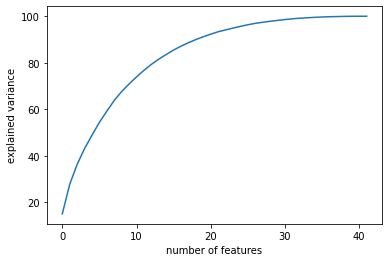

In [16]:
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("number of features")
plt.ylabel("explained variance")
plt.show()

In [33]:
#optimal number of features: 20

pca_20 = PCA(n_components=20, random_state=42)
pca_20.fit(x_train_scaled)
x_train_pca20 = pca_20.transform(x_train_scaled)
x_train_pca20.shape, sum(pca_20.explained_variance_ratio_ * 100)

((42, 20), 91.1841881621185)

In [ ]:
#make 2D/3D visualization 

##Regression models


In [18]:
from tensorflow.keras.layers import *

input_shape = x_train_fs.shape
model_1 = tf.keras.Sequential([
    Dense(64, activation="relu"),
    Dense(64, activation="relu"),
    Dense(1)
])

model_1.compile(loss="mae", optimizer="adam", metrics=["mae"])
model_1.fit(x_train_pca20, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 10ms/step - loss: 66.5526 - mae: 66.5526
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 66.0689 - mae: 66.0689
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 65.5973 - mae: 65.5973
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 65.1516 - mae: 65.1516
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 64.6883 - mae: 64.6883
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 64.2300 - mae: 64.2300
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 63.7388 - mae: 63.7388
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 63.2503 - mae: 63.2503
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 62.7803 - mae: 62.7803
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 62.2769 - mae: 62.2769
Epoch 11/100
2/2 [==============================] - 0s 6ms

In [19]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
def evaluation(y_true, y_pred):
  eval = {}
  eval["accuracy"] = accuracy_score(y_true, y_pred)
  eval["f1"] = f1_score(y_true, y_pred)
  eval["precision"] = precision_score(y_true, y_pred)
  eval["recall"] = recall_score(y_true, y_pred)

  return eval

In [20]:
def get_labels(vec):
  labels = 1*(tf.squeeze(vec>sufficient_treshhold).numpy())
  return labels

In [23]:
x_test_scaled = scaler.transform(x_test)
x_test_pca = pca_20.transform(x_test_scaled)
y_preds = get_labels(model_1.predict(x_test_pca))
eval_1 = evaluation(label_test, y_preds)
eval_1

1/1 [==============================] - 0s 91ms/step


{'accuracy': 0.5555555555555556,
 'f1': 0.3333333333333333,
 'precision': 0.2857142857142857,
 'recall': 0.4}

In [ ]:
#evaluate on test data

In [32]:
x_train_pca.shape

(42, 42)

In [34]:
model_2 = tf.keras.Sequential([
    Input(shape=(20,)),
    Dense(64, activation="relu"),
    Dense(64, activation="relu"),
    Dense(1, activation="sigmoid", name="output_layer")
])

model_2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model_2.fit(x_train_pca20, label_train, epochs=20)

Epoch 1/20
2/2 [==============================] - 1s 10ms/step - loss: 0.6757 - accuracy: 0.6190
Epoch 2/20
2/2 [==============================] - 0s 7ms/step - loss: 0.6036 - accuracy: 0.6905
Epoch 3/20
2/2 [==============================] - 0s 8ms/step - loss: 0.5495 - accuracy: 0.7143
Epoch 4/20
2/2 [==============================] - 0s 7ms/step - loss: 0.5086 - accuracy: 0.7619
Epoch 5/20
2/2 [==============================] - 0s 7ms/step - loss: 0.4706 - accuracy: 0.7619
Epoch 6/20
2/2 [==============================] - 0s 7ms/step - loss: 0.4358 - accuracy: 0.7619
Epoch 7/20
2/2 [==============================] - 0s 9ms/step - loss: 0.4041 - accuracy: 0.7619
Epoch 8/20
2/2 [==============================] - 0s 15ms/step - loss: 0.3801 - accuracy: 0.7857
Epoch 9/20
2/2 [==============================] - 0s 7ms/step - loss: 0.3551 - accuracy: 0.8333
Epoch 10/20
2/2 [==============================] - 0s 9ms/step - loss: 0.3316 - accuracy: 0.8810
Epoch 11/20
2/2 [====================

In [35]:
model_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 64)                1344      
                                                                 
 dense_8 (Dense)             (None, 64)                4160      
                                                                 
 output_layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 5,569
Trainable params: 5,569
Non-trainable params: 0
_________________________________________________________________


In [37]:
y_preds = get_labels(model_2.predict(x_test_pca))
# y_preds
eval_2 = evaluation(label_test, y_preds)
eval_2

1/1 [==============================] - 0s 31ms/step


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy': 0.7222222222222222, 'f1': 0.0, 'precision': 0.0, 'recall': 0.0}

In [ ]:
#accessing the last layer values as CM content values 
from keras import backend as K
last_layer_output = K.function(model_2.layers[0].input, model_2.get_layer("output_layer").output)
last_layer_output(x_train)

AttributeError: ignored

##Random Forest 

In [55]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=42)
regressor.fit(x_train_pca20, y_train)

RandomForestRegressor(n_estimators=20, random_state=42)

In [56]:
x_test_pca.shape

(18, 20)

In [57]:
from sklearn.metrics import r2_score
y_preds = regressor.predict(x_test_pca)
print("pred values:", y_preds)
print("true values:", y_test)
# r2 = r2_score(label_test, y_preds)
print(f"r2 score: {r2}")
y_preds = get_labels(y_preds)
# y_preds
eval_rf = evaluation(label_test, y_preds)
eval_rf, y_preds

pred values: [34.408 31.773 33.148 47.348 43.11  46.905 31.393 51.193 54.453 51.915
 50.708 28.018 32.613 45.508 34.984 31.009 28.59  35.613]
true values: 0     88
1     80
2     92
3     76
4     21
5     24
6     42
7     80
8     92
9     74
10    95
11    12
12    60
13     8
14    93
15    97
16    23
17    70
Name: dd10 CM Content, dtype: int64
r2 score: -9872.524169969227


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


({'accuracy': 0.7222222222222222, 'f1': 0.0, 'precision': 0.0, 'recall': 0.0},
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))